<a href="https://colab.research.google.com/github/brymer-meneses/GDetect/blob/main/src/deep_learning/training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 
import tensorflow_hub as hub
import numpy as np

from tensorflow.keras.models import save_model, load_model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
import os


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_dir = "/content/drive/MyDrive/BuildOnAsean2021/Training_Data"
batch_size = 3
img_size = (512, 512)

In [4]:
datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, vertical_flip=True, brightness_range=[0.8, 1.2])

In [5]:
dataset = datagen.flow_from_directory(
    data_dir, color_mode="rgb",
    batch_size=batch_size, 
    target_size=img_size, shuffle=True)

Found 92 images belonging to 7 classes.


In [6]:
print(dataset.class_indices)

{'DRIVERS_LICENSE': 0, 'INVALID': 1, 'NATIONAL ID': 2, 'PASSPORT': 3, 'PHILHEALTH': 4, 'SSS': 5, 'VOTER_S ID': 6}


In [7]:
URL = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_xl/feature_vector/2"
pretrained_model = hub.KerasLayer(URL, input_shape=(512,512,3))

In [8]:
model = Sequential()
model.add(pretrained_model)
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.30))
model.add(Dense(7, activation="softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              207615832 
_________________________________________________________________
dense (Dense)                (None, 512)               655872    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 3591      
Total params: 208,275,295
Trainable params: 659,463
Non-trainable params: 207,615,832
_________________________________________________________________


In [10]:
model.compile(optimizer = Adamax(), loss= 'categorical_crossentropy', metrics = ['accuracy'])


In [11]:
es = EarlyStopping(monitor = 'loss', patience =1)

In [12]:
history = model.fit(dataset, epochs = 10, callbacks = es)

Epoch 1/10
 9/31 [=======>......................] - ETA: 6s - loss: 3.5280 - accuracy: 0.2593

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


31/31 [==============================] - 45s 339ms/step - loss: 2.8880 - accuracy: 0.2935
Epoch 2/10
31/31 [==============================] - 9s 298ms/step - loss: 0.9772 - accuracy: 0.6304
Epoch 3/10
31/31 [==============================] - 9s 301ms/step - loss: 0.5191 - accuracy: 0.8370
Epoch 4/10
31/31 [==============================] - 9s 303ms/step - loss: 0.3075 - accuracy: 0.9239
Epoch 5/10
31/31 [==============================] - 9s 304ms/step - loss: 0.2531 - accuracy: 0.9457
Epoch 6/10
31/31 [==============================] - 9s 308ms/step - loss: 0.1899 - accuracy: 0.9674
Epoch 7/10
31/31 [==============================] - 10s 306ms/step - loss: 0.0943 - accuracy: 0.9891
Epoch 8/10
31/31 [==============================] - 10s 310ms/step - loss: 0.0951 - accuracy: 0.9891


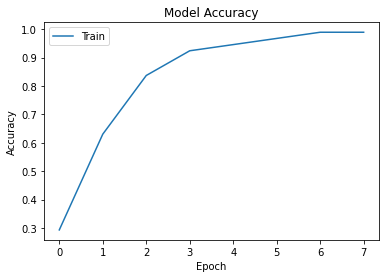

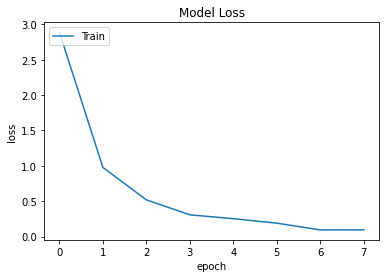

In [13]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc = 'upper left')
plt.show()

In [14]:
os.chdir('/content/drive/MyDrive/BuildOnAsean2021')
model.save("EfficientNetv2_xl.h5")
